## Importing the stock prediction data



In [ ]:
import yfinance as yf 

In [ ]:
sp500 = yf.Ticker("^GSPC")

In [ ]:
sp500 = sp500.history(period="max")

In [ ]:
sp500 #sp500 is the prediction dataframe

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-07-31 00:00:00-04:00,6427.020020,6427.020020,6327.640137,6339.390137,6077080000,0.0,0.0
2025-08-01 00:00:00-04:00,6287.279785,6287.279785,6212.689941,6238.009766,5827150000,0.0,0.0
2025-08-04 00:00:00-04:00,6271.709961,6330.689941,6271.709961,6329.939941,4842580000,0.0,0.0


In [ ]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-07-24 00:00:00-04:00', '2025-07-25 00:00:00-04:00',
               '2025-07-28 00:00:00-04:00', '2025-07-29 00:00:00-04:00',
               '2025-07-30 00:00:00-04:00', '2025-07-31 00:00:00-04:00',
               '2025-08-01 00:00:00-04:00', '2025-08-04 00:00:00-04:00',
               '2025-08-05 00:00:00-04:00', '2025-08-06 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24515, freq=None)

## Cleaning the data


<Axes: xlabel='Date'>

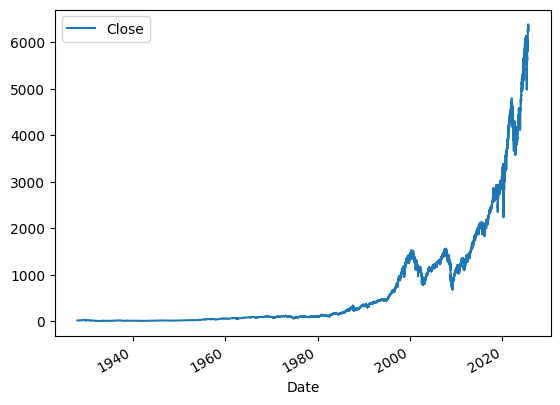

In [ ]:
sp500.plot.line(y='Close', use_index=True)

In [ ]:
del sp500['Dividends']
del sp500['Stock Splits']

## Setting up the target for machine learning (more cleaning only)


In [ ]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-07-31 00:00:00-04:00,6427.020020,6427.020020,6327.640137,6339.390137,6077080000,6238.009766
2025-08-01 00:00:00-04:00,6287.279785,6287.279785,6212.689941,6238.009766,5827150000,6329.939941
2025-08-04 00:00:00-04:00,6271.709961,6330.689941,6271.709961,6329.939941,4842580000,6299.189941


In [ ]:
sp500["Target"] = ((sp500["Tomorrow"] > sp500["Close"]).astype(int))

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-07-31 00:00:00-04:00,6427.020020,6427.020020,6327.640137,6339.390137,6077080000,6238.009766,0
2025-08-01 00:00:00-04:00,6287.279785,6287.279785,6212.689941,6238.009766,5827150000,6329.939941,1
2025-08-04 00:00:00-04:00,6271.709961,6330.689941,6271.709961,6329.939941,4842580000,6299.189941,0


In [ ]:
sp500 = sp500.loc["1990-01-01":].copy() #.copy avoid pandas basic errors

# Training an initial machine learning  model




In [ ]:
from sklearn.ensemble import RandomForestClassifier #supports decision trees

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1) # if the re-run the model twice it will give the same results

#time series data
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"]) #using the predictors to train the model

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [ ]:
import pandas as pd

preds = pd.Series(preds, index=test.index) # putting them in a pandas series

In [ ]:
precision_score(test["Target"], preds) # v less prediction score

0.5942028985507246

In [ ]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

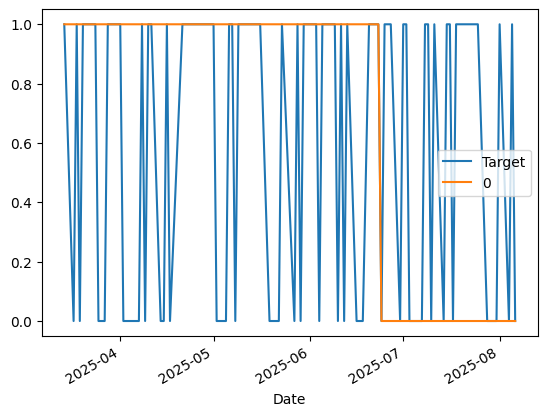

In [ ]:
combined.plot()

# Building the backtesting system

In [ ]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined
#backtesting by taking 10 years of data, and training a data by an year after an year.

In [ ]:
def backtest(data, model, predictors, start=2500, step=250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy() # training set for 10 years straight
    test = data.iloc[i:(i+step)].copy() # testing set for 10 years straight
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [ ]:
predictions = backtest(sp500, model, predictors)

In [ ]:
predictions["Predictions"].value_counts()

,count
Predictions,
0,3799
1,2666


In [ ]:
precision_score(predictions["Target"], predictions["Predictions"]) #not good

0.5296324081020255

In [ ]:
predictions["Target"].value_counts()/predictions.shape[0]

,count
Target,
1,0.536736
0,0.463264


# Adding additional predictors to our model


In [ ]:
horizons = [2,5,60,250,1000] #we'll calculate the mean for these days and the find the ratio in todays trading price and previous trading prices
new_predictors = []

for horizon in horizons: #looping through the horizons
  rolling_averages = sp500.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors.append(ratio_column)
  new_predictors.append(trend_column)

In [ ]:
sp500

In [ ]:
sp500.dropna()

# Improving the model

In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  # Predict probabilities instead of classes
  preds = model.predict_proba(test[predictors])[:, 1] # Predict the probability of the target being 1 (price going up)
  preds[preds >= .6] = 1  # Set a threshold for buying
  preds[preds < .6] = 0  # Otherwise, don't buy
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [ ]:
predictions = backtest(sp500, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

,count
Predictions,
0,3799
1,2666


In [ ]:
precision_score(predictions["Target"], predictions["Predictions"]) #52% the price would go up in stock from 1993 to present

0.5296324081020255